#### Preparación para correr el código

In [18]:
import cv2;
import numpy as np;
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


In [2]:
drive_path = ".."

#### Ejercicio 1: Transformaciones lineales de una imagen
Conociendo la ecuación general de una transformación lineal:
\begin{equation*}
    s = ar+c
\end{equation*}
con $r$: valor de entrada, $a$: factor de ganancia y $c$: offset, realice los siguientes ejercicios:
1. Implemente una LUT (Look-Up Table) del mapeo de entrada y salida.
2. Pruebe la rutina con diferentes juegos de coeficientes $a$ y $c$, sobre diversas imágenes, y muestre en una misma ventana la imagen original, el mapeo aplicado y la imagen obtenida.
3. Implemente el negativo de la imagen de entrada.
4. Genere diversas LUT con estiramientos y compresiones lineales por tramos de la entrada, y pruebe los resultados sobre diversas imágenes.
5. *(Opcional)*: genere una imagen binaria de 256x256 que simule los ejes cartesianos de la transformacion $r-s$, marcando la línea identidad. Capture dos puntos que marquen el final de los segmentos, y genere la LUT con una transformación que parta del origen, pase por los puntos marcados, y finalice en el punto (256x256). Pruebe la rutina con diversas imágenes.


In [3]:
def mostrar_imagen(img_path,):
  img = cv2.imread(drive_path+img_path)
  plt.figure()
  plt.imshow(img)
  plt.show()
  print("Alto, ancho y n_canales = %s" %str(img.shape))

img_list = ["/images/billete.jpg",
            "/images/chairs_oscura.jpg",
            "/images/bone.tif",
            "/images/botellas.tif",
            "/images/building.jpg",
            "/images/camaleon.tif",
            ]

img = img_list[1]
# mostrar_imagen(img)


In [4]:
# 1
def lineal_transformation(srcImg,a=1.0,c=0,lookUpTable=None):

    outImg = srcImg.copy()

    if lookUpTable is None:
        lookUpTable = np.empty((1,256), np.uint8)
        for i in range(256):
            lookUpTable[0,i] = np.clip(a*i+c,0,255)

    outImg = cv2.LUT(srcImg,lookUpTable)

    return outImg

def show_lineal_transformation(srcImg,outImg,grayscale=True, fig=None):

    cmap_value = "gray" if grayscale else None

    gs = gridspec.GridSpec(1,2)

    plt.subplot(121)
    plt.imshow(srcImg,cmap=cmap_value,vmin=0,vmax=255)

    plt.subplot(122)
    plt.imshow(outImg,cmap=cmap_value,vmin=0,vmax=255)

    return fig


In [20]:
# 2 y 3
grayscale_chairs = False
grayscale_billete = True

# Imagen 1
if (grayscale_chairs):
    img_chairs = cv2.imread(drive_path+img_list[1],cv2.IMREAD_GRAYSCALE)
else:
    img_chairs = cv2.imread(drive_path+img_list[1])
    img_chairs = cv2.cvtColor(img_chairs,cv2.COLOR_BGR2RGB)

a1 = 2.0
c1 = 10

fig_chairs = plt.figure("chairs")
def interact_chairs(a,c):
    img_t1 = lineal_transformation(img_chairs,a,c)
    show_lineal_transformation(img_chairs,img_t1,grayscale=grayscale_chairs,fig=fig_chairs)
    plt.show()

# display(fig_chairs)
widgets.interact(
    interact_chairs,
    a=widgets.FloatSlider(value=a1,min=-1,max=3,step=0.01),
    c=widgets.IntSlider(value=c1,min=-255,max=255),
    continuous_update=False
    )

## Encontrar como hacer para que updatee bien (esta como que updateando dos veces)
## ----- En mi compu anda -----



# Imagen 2
# if (grayscale_billete):
#     img_billete = cv2.imread(drive_path+img_list[0],cv2.IMREAD_GRAYSCALE)
# else:
#     img_billete = cv2.imread(drive_path+img_list[0])
#     img_billete= cv2.cvtColor(img_billete,cv2.COLOR_BGR2RGB)

# fig_billete = plt.figure("billete")
# def interact_billete(a,c):
#     img_t2 = lineal_transformation(img_billete,a,c)
#     show_lineal_transformation(img_billete,img_t2,grayscale=grayscale_billete,fig=fig_billete)
#     plt.show()

# widgets.interact(
#     interact_billete,
#     a=widgets.FloatSlider(value=-1,min=-1,max=3,step=0.01),
#     c=widgets.IntSlider(value=255,min=-255,max=255)
#     )


<Figure size 640x480 with 0 Axes>

interactive(children=(FloatSlider(value=2.0, description='a', max=3.0, min=-1.0, step=0.01), IntSlider(value=1…

<function __main__.interact_chairs(a, c)>

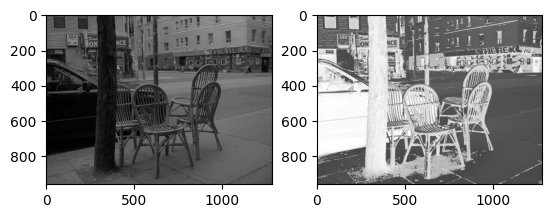

In [6]:
# 4
# Modificaciones por rango, es decir, los pixeles cuya intensidad se encuentre en un
# intervalo [a,b] recibiran una transformacion, los que esten en otro intervalo (b,c]
# recibiran otra, etc.

lookUpTable = np.empty((1,256), np.uint8)
a_1 = -1
c_1 = 255

a_2 = 0.5
c_2 = 30

a_3 = 1.5
c_3 = -20

# Intensidad entre 0 y 75
for i in range(75):
    lookUpTable[0,i] = np.clip(a_1*i+c_1,0,255)

# Intensidad entre 76  y 150
for i in range(76,150):
    lookUpTable[0,i] = np.clip(a_2*i+c_2,0,255)

# Intensidad entre 151 y 256
for i in range(151,256):
    lookUpTable[0,i] = np.clip(a_3*i+c_3,0,255)


img_chairs = cv2.imread(drive_path+img_list[1],cv2.IMREAD_GRAYSCALE)
img_t = lineal_transformation(img_chairs,lookUpTable=lookUpTable)
show_lineal_transformation(img_chairs,img_t,grayscale=True)

#### Ejercicio 2: Transformaciones no lineales
1. Implementar la transformación logarítmica $s = \log(1+r)$ y la transformación de potencia $s = r^{\gamma} (c=1)$
2. Realizar el procesado sobre la imagen 'rmn.jpg', utilizando los dos procesos por separado.

In [7]:
def log_transformation(srcImg,c=1,lookUpTable=None):

    outImg = srcImg.copy()

    if lookUpTable is None:
        lookUpTable = np.empty((1,256), np.uint8)
        for i in range(256):
            lookUpTable[0,i] = np.clip(c*np.log(1+i),0,255)

    outImg = cv2.LUT(srcImg,lookUpTable)

    return outImg

def pow_transformation(srcImg,c=1,gamma=1,lookUpTable=None):

    outImg = srcImg.copy()

    if lookUpTable is None:
        lookUpTable = np.empty((1,256), np.uint8)
        for i in range(256):
            lookUpTable[0,i] = np.clip(255 * pow(i/255,gamma),0,255)

    outImg = cv2.LUT(srcImg,lookUpTable)

    return outImg

In [8]:
grayscale_log = False

path_rmn = "/images/rmn.jpg"

img_logpow = cv2.imread(drive_path+path_rmn,cv2.IMREAD_GRAYSCALE)


fig_log = plt.figure("log")
def interact_rmn_log(c):
  img_tlog = log_transformation(img_logpow,c)
  show_lineal_transformation(img_logpow,img_tlog,fig_log)
  plt.show()

fig_pow= plt.figure("pow")
def interact_rmn_pow(gamma):
  img_tpow = pow_transformation(img_logpow,255,gamma)
  show_lineal_transformation(img_logpow,img_tpow,fig_pow)
  plt.show()

widgets.interact(
  interact_rmn_log,
  c=widgets.IntSlider(value=26,min=-10,max=100,step=2),
)

widgets.interact(
  interact_rmn_pow,
  gamma=widgets.FloatSlider(value=0.7,min=0,max=2.5,step=0.05),
)



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=26, description='c', min=-10, step=2), Output()), _dom_classes=('widget-…

interactive(children=(FloatSlider(value=0.7, description='gamma', max=2.5, step=0.05), Output()), _dom_classes…

<function __main__.interact_rmn_pow(gamma)>

#### Ejercicio 3: Operaciones aritméticas
1. Implemente una función que realice las siguientes operaciones aritméticas sobre dos imágenes que sean pasadas como parámetros:
    <ol type="a">
        <li>Suma. Normalice el resultado por el número de imágenes.</li>
        <li> Diferencia. Aplique las dos funciones de reescalado usadas típicamente para evitar el desborde de rango (sumar 255 y dividir por 2, o restar el mínimo y escalar a 255).</li>
        <li> Multiplicación. En esta operación la segunda imagen deberá ser una máscara binaria, muy utilizada para la extracción de la <em>región de interes</em> (ROI) de una imagen.</li>
    </ol>
2. A partir de un video (pedestrians.mp4) de una cámara de seguridad, debe obtener solamente el fondo de la imagen. Incorpore un elemento TrackBar que le permita ir eligiendo el número de frames a promediar para observar los resultados instantáneamente.

```{python}
import numpu as np
import cv2
cap = cv2.VideoCapture("pedestrians.mp4")
while (cap.isOpened()):
    ret, frame = cap.read()
```

In [11]:
 # a
def sum_images(images):
    sum_image = np.zeros_like(images[0], dtype=np.float64)

    for image in images:
        sum_image += image.astype(np.float64)

    sum_image = (sum_image / len(images)).astype(np.uint8)

    return sum_image

#b
def diff_images(img1,img2):
  diff_image = img1.astype(np.float64)-img2.astype(np.float64)

  diff_image =  0.5 * (diff_image + 255*np.ones_like(diff_images))

  return diff_image.astype(np.uint8)

#c
def multiply_images(img1,img2):
  mult_image = img1.astype(np.float64)*img2.astype(np.float64)/256


  print(img2.astype(np.float64)[1,10:30])

  return mult_image.astype(np.uint8)


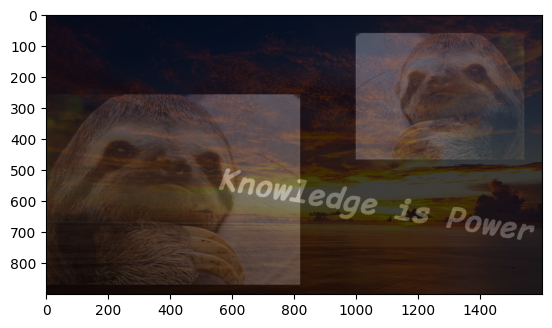

In [12]:
# prueba de funcion a
paths_suma = [
    "/images/sloth.png",
    "/images/sloth2.png",
    "/images/sloth_text.png",
    "/images/horizon.jpg"
]

list_images = []
for path in paths_suma:
  im = cv2.imread(drive_path+path)
  im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  list_images.append(im)

sum_image = sum_images(list_images)

plt.figure()
plt.imshow(sum_image)
plt.show()

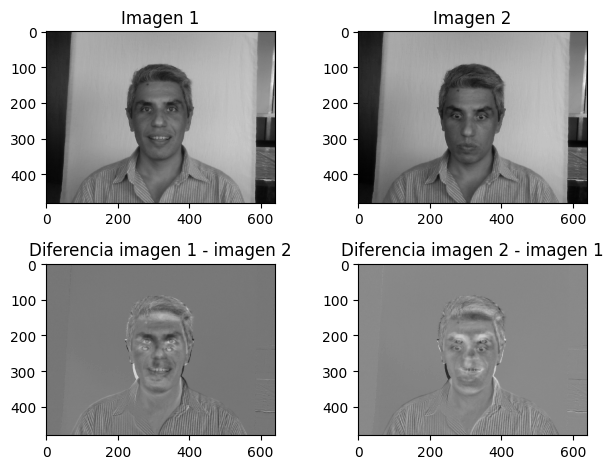

In [13]:
# prueba de funcion b
path_diff = [
    "/images/s01_i06_H_CM.png",
    "/images/s01_i08_H_CM.png",
]

images2diff = [cv2.imread(drive_path+path,cv2.IMREAD_GRAYSCALE) for path in path_diff]

diff_image12 = diff_images(images2diff[0],images2diff[1])
diff_image21 = diff_images(images2diff[1],images2diff[0])

gs = gridspec.GridSpec(2,2)

fig = plt.figure(tight_layout=True)

for i in range(2):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(images2diff[i],cmap="gray")
    ax.set_title("Imagen %d"%(i+1))


ax1 = fig.add_subplot(gs[1,0])
ax1.imshow(diff_image12,cmap="gray")
ax1.set_title("Diferencia imagen 1 - imagen 2")


ax1 = fig.add_subplot(gs[1,1])
ax1.imshow(diff_image21,cmap="gray")
ax1.set_title("Diferencia imagen 2 - imagen 1")

plt.show()

[  0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255.]


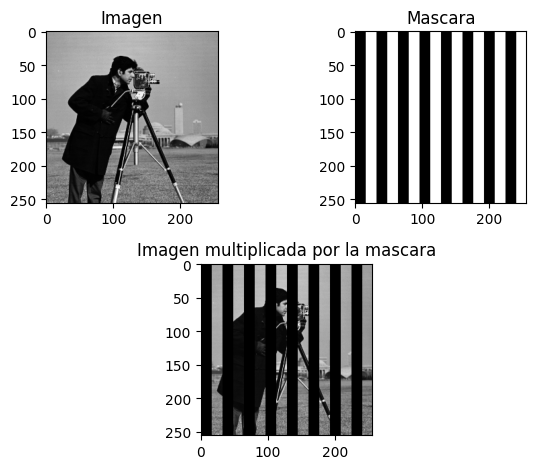

In [14]:
# prueba de funcion c
path_multiply = [
    "/images/cameraman.tif",
    "/images/patron2.tif"
]

images2mult = [cv2.imread(drive_path+path,cv2.IMREAD_GRAYSCALE) for path in path_multiply]

mult_image = multiply_images(images2mult[0],images2mult[1])

gs = gridspec.GridSpec(2,2)

fig = plt.figure(tight_layout=True)

for i in range(2):
    ax = fig.add_subplot(gs[0, i])
    ax.imshow(images2mult[i],cmap="gray")
    if i == 0:
      title = "Imagen"
    else:
      title = "Mascara"
    ax.set_title(title)


ax1 = fig.add_subplot(gs[1,:])
ax1.imshow(mult_image,cmap="gray")
ax1.set_title("Imagen multiplicada por la mascara")

plt.show()



In [15]:
## 2
pedestrians_path = "/images/pedestrians.mp4"

def video_background(path,num_frames=None):
  cap = cv2.VideoCapture(path)

  frame_actual = 0
  sum_frames = np.zeros((576,768,3), dtype=np.float64)
  frames_list = []
  while (cap.isOpened()):
      ret, frame = cap.read()

      # Cuando ret es False el video ya termino
      if not ret:
        break

      frame_actual +=1
      frames_list.append(frame)

  frames = np.array(frames_list,dtype=np.float64)

  if num_frames is None or num_frames > frames.shape[0]:
    frames_usados = frames.shape[0]
  else:
    frames_usados = num_frames

  for n in range(0,frames_usados):
    sum_frames += np.array(frames[n,:,:,:],dtype=np.float64)

  sum_frames = (sum_frames/frames_usados).astype(np.uint8)  # normalizar
  sum_frames = cv2.cvtColor(sum_frames,cv2.COLOR_BGR2RGB)   # color a rgb

  return sum_frames

# -------------
plt.figure()
def interact_pedestrians(num_frames):
  pedestrians_bg = video_background(drive_path+pedestrians_path,num_frames)
  plt.imshow(pedestrians_bg)
  plt.show()

widgets.interact(
  interact_pedestrians,
  num_frames=widgets.IntSlider(value=1,min=1,max=120,step=2),
  continuous_update=False
)



<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=1, description='num_frames', max=120, min=1, step=2), Output()), _dom_cl…

<function __main__.interact_pedestrians(num_frames)>

#### Ejercicio 4: Trabajos de aplicación
1. Utilizando las técnicas aprendidas descubra que objetos no están perceptibles en la imagen *earth.bmp* y realce la imagen de forma que los objetos se vuelvan visibles con un buen contraste sin realizar modificaciones sustanciales en el resto de la imagen.

2. Al final del proceso de manufacturación de placas madre de marca ASUS, modelo A7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE. Implemente un algoritmo que, a partir de una imagen, determine que tipo de placa es. Haga uso de las técnicas de realce aprendidas y utilice las imágenes *a7v600-x.gif* y *a7v600-se.gif*. Adapte el método de forma que contemple reconocimiento de imágenes que han sido afectadas por un ruido aleatorio impulsivo (*a7v600-x(RImpulsivo).gif* y *a7v600-SE(RImpulsivo).gif*).

3. En una fábrica de medicamentos se desea implementar un sistema para la inspeccíon visual automática de blisters en la línea de empaquetado. La adquisición de la imagen se realiza en escala de grises mediante una cámara CCD fija y bajo condiciones controladas de iluminación, escala y enfoque. El objetivo consiste en determinar en cada instante si el blister que está siendo analizado se encuentra incompleto, en cuyo caso la región correspondiente a la píldora faltante presenta una intensidad similar al fondo. Escriba una función que reciba como parámetro la imágen del blister a analizar y devuelva un mensaje indicando si el mismo contiene la totalidad o no de las píldoras. En caso de estar incompleto, indique la posición $(x,y)$ de las píldoras faltantes. Verifique el funcionamiento con las imágenes *blister_completo.jpg* y *blister_incompleto.jpg*.

4. (Opcional) Implemente una función que permita "esconder" una imagen binaria en una imagen de grises sin que esto sea percibido a simple vista. Luego implemente una función que permita extraer la imagen binaria. Analice su desempeño. [Utilice rodajas del plano de bits]

##### 1

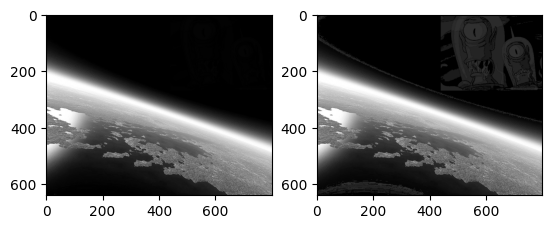

<Figure size 640x480 with 0 Axes>

In [16]:
path_earth = "/images/earth.bmp"

img_earth = cv2.imread(drive_path + path_earth, cv2.IMREAD_GRAYSCALE)

gamma = 0.4

lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
  if i < 5:
    lookUpTable[0,i] = np.clip(255 * pow(i/255,gamma),0,255)
  else:
    lookUpTable[0,i] = i

earth_t1 = pow_transformation(img_earth, lookUpTable=lookUpTable)
show_lineal_transformation(img_earth,earth_t1)

plt.figure()
# plt.imshow(img_earth,cmap="gray",vmin=0,vmax=255)
# plt.imshow(earth_t1,cmap="gray",vmin=0,vmax=255)
plt.show()


##### 2

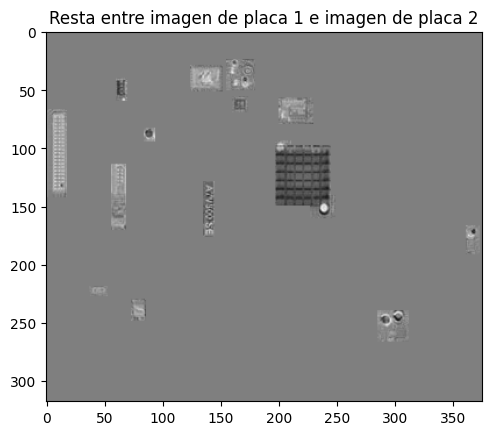

Resultado imagen placa A7V600-X sin ruido:  Placa A7V600-X - Valor de intensidad promedio en zonas determinadas: 0.893781
Resultado imagen placa A7V600-X con ruido:  Placa A7V600-X - Valor de intensidad promedio en zonas determinadas: 0.826817
Resultado imagen placa A7V600-SE sin ruido:  Placa A7V600-SE - Valor de intensidad promedio en zonas determinadas: 0.541144
Resultado imagen placa A7V600-SE con ruido:  Placa A7V600-SE - Valor de intensidad promedio en zonas determinadas: 0.537353


In [87]:
path_placas = ["/images/a7v600-X.gif","/images/a7v600-SE.gif","/images/a7v600-X(RImpulsivo).gif","/images/a7v600-SE(RImpulsivo).gif"]

def gif2array(path):
  gif = cv2.VideoCapture(path)
  frames_array = []
  while (gif.isOpened()):
    ret, frame = gif.read()
    if not ret:
      break

    frames_array.append(frame)

  return frames_array

def mask_below(img,value):
  mask = np.ones_like(img)

  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      for c in range(img.shape[2]):
        if img[y,x,c] < value:
          mask[y,x] = 0


  return mask.astype(np.float32)

x0, x1 = (180,260)
y0, y1 = (80,170)
zonas = [[(80,170),(180,260)],[(60,140),(0,20)],[(30,50),(120,160)],[(85,95),(85,95)],[(115,140),(55,70)]]


def promedio_valores(path,zonas,mask_max=20):
  img = gif2array(path)
  img = np.array(img[0])
  img = pow_transformation(img,gamma=2)
  # img = img[zonas[0][0]:zonas[0][1],zonas[1][0]:zonas[1][1],:]
  img = mask_below(img[zonas[0][0]:zonas[0][1],zonas[1][0]:zonas[1][1],:],mask_max)
  return img


img1 = gif2array(drive_path+path_placas[0])
img1 = np.array(img1[0])

img2 = gif2array(drive_path+path_placas[1])
img2 = np.array(img2[0])

diff = diff_images(img1,img2)

plt.figure()
plt.title("Resta entre imagen de placa 1 e imagen de placa 2")
plt.imshow(diff,cmap='gray')
plt.show()

mean1 = 0
mean2 = 0
for zona in zonas:
  img_placa1  = promedio_valores(drive_path+path_placas[2],zona,20)
  img_placa2  = promedio_valores(drive_path+path_placas[3],zona,20)
  mean1 += np.mean(img_placa1)
  mean2 += np.mean(img_placa2)

mean1 /= len(zonas)
mean2 /= len(zonas)

def clasificar_placa(path,zonas):
  mean = 0
  for zona in zonas:
    img_placa  = promedio_valores(path,zona,20)
    mean += np.mean(img_placa)
  mean /= len(zonas)
  if (mean >= 0.7):
    return "Placa A7V600-X - Valor de intensidad promedio en zonas determinadas: %f"%(mean)
  else:
    return "Placa A7V600-SE - Valor de intensidad promedio en zonas determinadas: %f"%(mean)

print("Resultado imagen placa A7V600-X sin ruido: ",clasificar_placa(drive_path+path_placas[0],zonas))
print("Resultado imagen placa A7V600-X con ruido: ",clasificar_placa(drive_path+path_placas[2],zonas))

print("Resultado imagen placa A7V600-SE sin ruido: ",clasificar_placa(drive_path+path_placas[1],zonas))
print("Resultado imagen placa A7V600-SE con ruido: ",clasificar_placa(drive_path+path_placas[3],zonas))


# plt.figure()
# plt.subplot(121)
# plt.imshow(img_placa1,cmap="gray",vmin=0,vmax=1)
# plt.subplot(122)
# plt.imshow(img_placa_ruido1,cmap="gray",vmin=0,vmax=1)
# plt.show()

# plt.figure()
# # plt.subplot(121)
# plt.imshow(img_placa2,cmap="gray")
# # plt.subplot(122)
# # plt.imshow(img_placa_ruido2,cmap="gray")
# plt.show()

##### 3

Completo
Incompleto


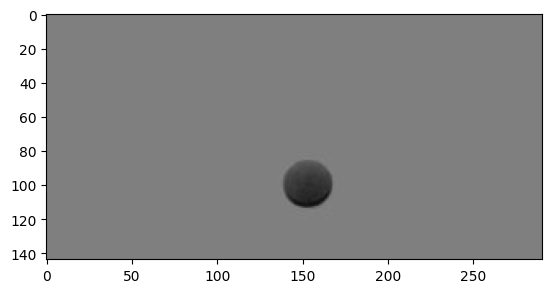

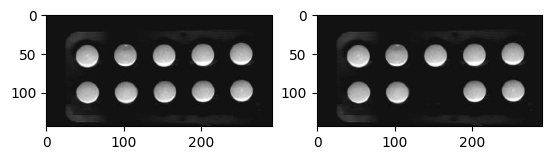

In [113]:
# Suponiendo que las condiciones estan dadas para que la resta entre las imagenes de dos blister
# solo hagan notar la diferencia en la cantidad de pastillas (el blister esta exactamente en la 
# misma posicion y sin rotar, no hay ruido y las imagenes tiene el mismo tamaño).

path_blister_completo = "/images/blister_completo.jpg"
path_blister_incompleto = "/images/blister_incompleto.jpg"

blister_completo = cv2.imread(drive_path+path_blister_completo,cv2.IMREAD_GRAYSCALE)
blister_incompleto = cv2.imread(drive_path+path_blister_incompleto,cv2.IMREAD_GRAYSCALE)

diff_blister = diff_images(blister_incompleto,blister_completo[:,0:blister_completo.shape[1]-1])

# Si el promedio de los valores de la imagen es distinto de 128 (gris obtenido de restar dos imagenes iguales)
# entonces hay una diferencia en el contenido de los blister

def is_full(img):
    full_blister = cv2.imread(drive_path+path_blister_completo,cv2.IMREAD_GRAYSCALE)
    diff_blister = diff_images(img,full_blister[:,0:blister_completo.shape[1]-1])
    resultado = "Completo"
    if (np.mean(diff_blister) != 127.0):
        resultado = "Incompleto"
    return resultado


print(is_full(blister_completo[:,0:blister_completo.shape[1]-1]))
print(is_full(blister_incompleto))



plt.figure()
plt.imshow(diff_blister,cmap='gray',vmin=0,vmax=255)
plt.show()

fig,ax = plt.subplots(1,2)
ax[0].imshow(blister_completo,cmap='gray')
ax[1].imshow(blister_incompleto,cmap='gray')
plt.show()